# 2019/01/16    - test campaign 1, day 3
##    3.3 Optimize M1 only figure
##     3.5 Measure M1 and M3 before and after various perturbations
##    3.7 Measure M1 and M3 bending modes (M1 BM 1-4 only; no M3)

In [1]:
from M1M3tools import *
import numpy as np
import matplotlib.pyplot as plt
import glob

%matplotlib inline
plt.jet()

dateID = 190116

<Figure size 432x288 with 0 Axes>

## Another round of optimization using Bo's calculated (but incorrect) initial force set
#### The dual actuator weights were not taken into account correctly in these calculations.

3-5 bend0 ------ irow = 0, icol = 0, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend0 burst50 morph -FC -CGH Rmod -FC.h5: Wed Jan 16 09:21:53 2019 
3-5 bend1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend1 burst50 morph -FC -CGH Rmod -FC.h5: Wed Jan 16 10:01:58 2019 
3-5 bend2 ------ irow = 0, icol = 2, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend2 burst50 morph -FC -CGH Rmod -FC.h5: Wed Jan 16 10:28:41 2019 
3-5 bend3 ------ irow = 1, icol = 0, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend3 burst50 morph -FC -CGH Rmod -FC.h5: Wed Jan 16 10:35:44 2019 
3-5 bend4 ------ irow = 1, icol = 1, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend4 burst50 morph -FC -CGH Rmod -FC.h5: Wed Jan 16 10:41:13 2019 
3-5 bend5 ------ irow = 1, icol = 2, -----------------------------
/Processed/190116_3-5/190116 3-5 M1 bend5 burst50 morph -FC -CGH Rmod -FC.h5: 

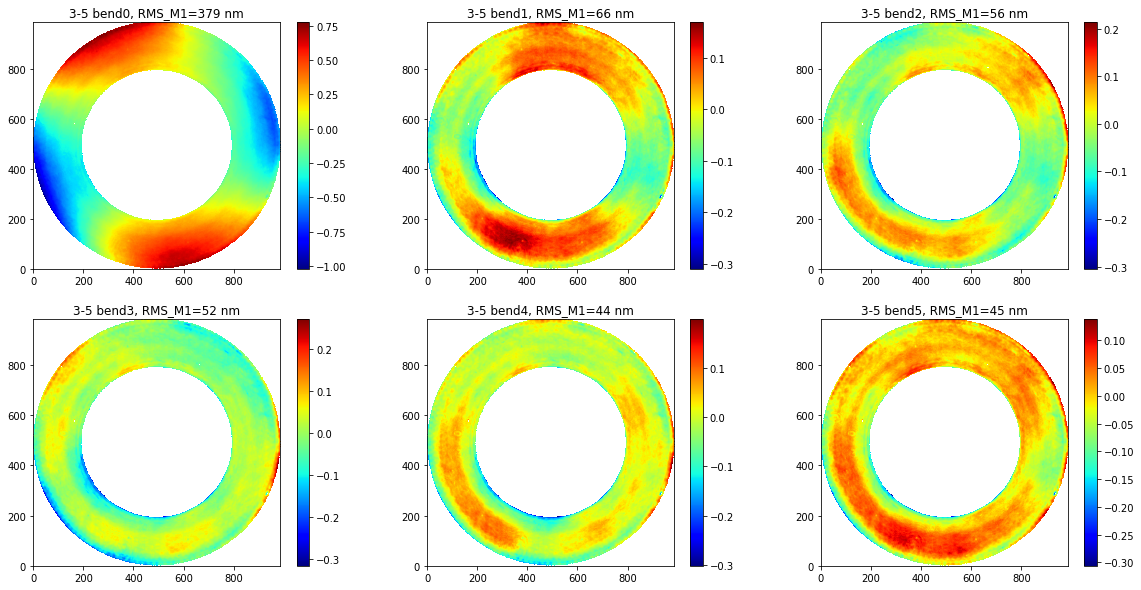

In [2]:
testID = '3-5' #Mirror Lab put this in 3-5 folder.
fig, ax = plt.subplots(2,3,figsize=(20,10))
i = 0
iter = ''
for bend in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    i += 1
    print('%s bend%s ------ irow = %d, icol = %d, -----------------------------'%(testID, bend, irow, icol))
    fileset = sorted(glob.glob('%s/Processed/%d_%s%s/%d %s M1 bend%d*burst*morph -FC -CGH Rmod -FC.h5'%(
        dataDir, dateID, testID, iter, dateID, testID, bend)))
    m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lowerleft')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s%s bend%d, RMS_M1=%.0f nm'%(testID,iter, bend, m1rms))

### We assumed that M1 is more sensitive to perturbation. The repeatability tests were done on M1 only
#### First measure M1 reference.

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 ref burst50 morph.h5: Wed Jan 16 11:33:34 2019 


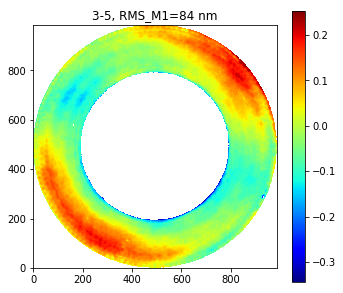

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 ref*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )
fig.delaxes(ax.flatten()[1])
refs = m1s

#### Applied 3N RMS bending mode 1, then remove it.

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterbm1-1 burst50 morph.h5: Wed Jan 16 11:37:58 2019 
/Processed/190116_3-5/190116 3-5 M1 afterbm1-2 burst50 morph.h5: Wed Jan 16 11:42:18 2019 


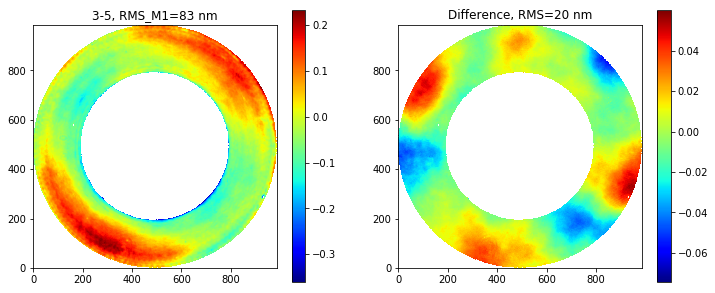

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterbm1-*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Applied 20N RMS bending mode 22, then removed it

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterbm22-20N-1 burst50 morph.h5: Wed Jan 16 11:48:36 2019 
/Processed/190116_3-5/190116 3-5 M1 afterbm22-20N-2 burst50 morph.h5: Wed Jan 16 11:52:48 2019 


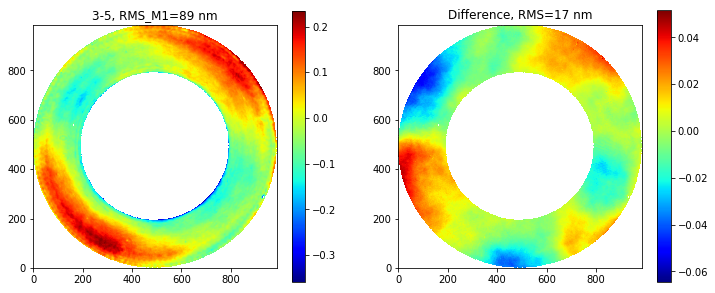

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterbm22-20N*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Applied 40N RMS bending mode 22, then removed it

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterbm22-40N-1 burst50 morph.h5: Wed Jan 16 11:58:15 2019 
/Processed/190116_3-5/190116 3-5 M1 afterbm22-40N-2 burst50 morph.h5: Wed Jan 16 12:02:39 2019 


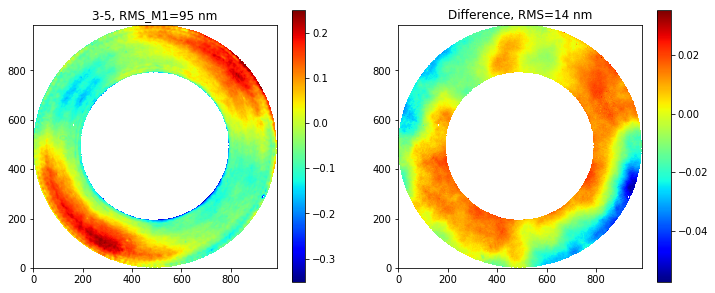

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterbm22-40N*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Applied 60N RMS bending mode 22, then removed it

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterbm22-60N-1 burst50 morph.h5: Wed Jan 16 12:06:49 2019 
/Processed/190116_3-5/190116 3-5 M1 afterbm22-60N-2 burst50 morph.h5: Wed Jan 16 12:10:37 2019 


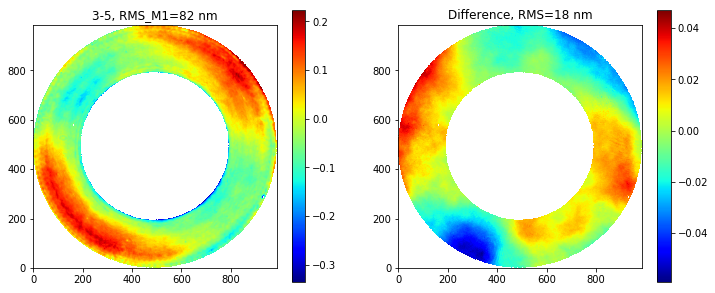

In [7]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterbm22-60N*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Translate the mirror with the hard points along x by 1mm, then move it back

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterx-1 burst50 morph.h5: Wed Jan 16 12:16:29 2019 
/Processed/190116_3-5/190116 3-5 M1 afterx-2 burst50 morph.h5: Wed Jan 16 12:20:50 2019 


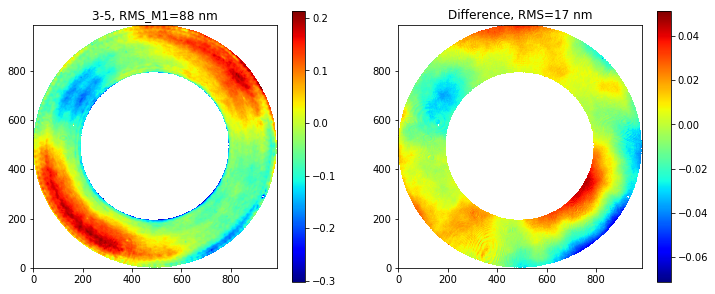

In [8]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterx-*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Translate the mirror with the hard points along y by 1mm, then move it back

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 aftery-1 burst50 morph.h5: Wed Jan 16 12:25:52 2019 
/Processed/190116_3-5/190116 3-5 M1 aftery-2 burst50 morph.h5: Wed Jan 16 12:30:14 2019 


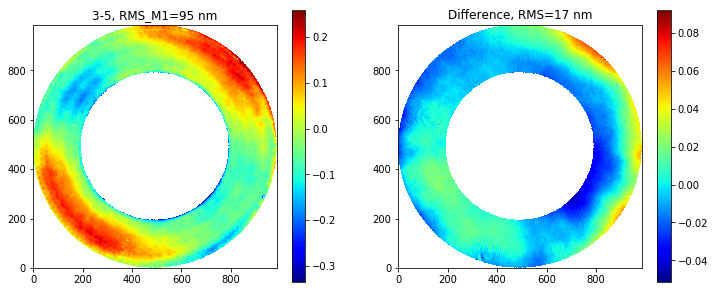

In [9]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 aftery-*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Translate the mirror with the hard points along z by 1mm, then move it back

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterz-1 burst50 morph.h5: Wed Jan 16 12:34:34 2019 
/Processed/190116_3-5/190116 3-5 M1 afterz-2 burst50 morph.h5: Wed Jan 16 12:39:10 2019 


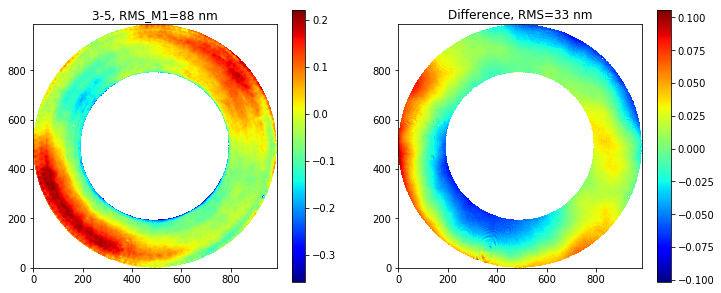

In [10]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterz-*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

#### Lowered the mirror onto static support, then raise it, reapply nominal forces

3-5 ------ irow = 0, icol = 0, -------Looking at following files ---------------
/Processed/190116_3-5/190116 3-5 M1 afterstatic-1 burst50 morph.h5: Wed Jan 16 12:51:36 2019 
/Processed/190116_3-5/190116 3-5 M1 afterstatic-2 burst50 morph.h5: Wed Jan 16 12:59:08 2019 


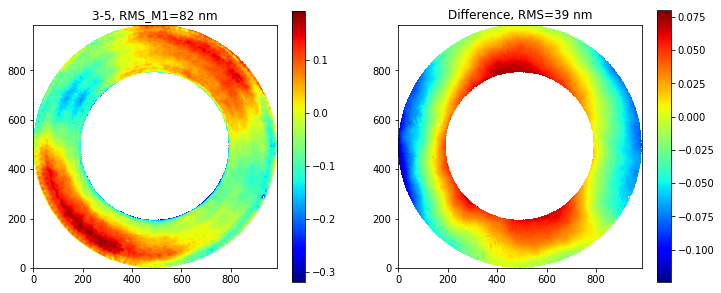

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
irow = 0
icol = 0
print('%s%s ------ irow = %d, icol = %d, -------Looking at following files ---------------'%(
    testID, iter, irow, icol))
pattern = '%s/Processed/%d_%s/%d %s M1 afterstatic-*morph.h5'%(
        dataDir, dateID, testID, dateID, testID)
fileset = sorted(glob.glob(pattern))
if len(fileset) == 0:
    print(pattern)    
m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

[x1, y1] = mkXYGrid(m1s, centerRow1, centerCol1, pixelSize1)

m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
img = ax[icol].imshow(m1s, origin='lowerleft')
fig.colorbar(img, ax=ax[icol])
ax[icol].set_title('%s%s, RMS_M1=%.0f nm'%(
    testID,iter, m1rms) )

diffs = m1s -refs
diffrms = np.std(diffs[~np.isnan(diffs)])*1000 #convert into nm
img = ax[1].imshow(diffs, origin='lowerleft')
fig.colorbar(img, ax=ax[1])
ax[1].set_title('Difference, RMS=%.0f nm'%diffrms)
refs = m1s

### The rest of the day was M1 bending mode 1 - 4 (Mirror Lab bending modes)
### In this section, we are not making fits to FEA bending modes, because we don't have M3 measurements yet.
#### bending mode 1

3-7 bending mode 1 ------ irow = 0, icol = 0, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm+1-1 burst50 morph.h5: Wed Jan 16 16:08:15 2019 
3-7 bending mode 1 ------ irow = 0, icol = 1, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm-1-1 burst50 morph.h5: Wed Jan 16 16:12:51 2019 
3-7 bending mode 1 ------ irow = 0, icol = 2, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm-1-2 burst50 morph.h5: Wed Jan 16 16:16:08 2019 
3-7 bending mode 1 ------ irow = 0, icol = 3, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm+1-2 burst50 morph.h5: Wed Jan 16 16:19:42 2019 
3-7 bending mode 2 ------ irow = 1, icol = 0, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm+2-1 burst50 morph.h5: Wed Jan 16 16:24:53 2019 
3-7 bending mode 2 ------ irow = 1, icol = 1, -----------------------------
/Processed/190116_3-7/190116 3-7 M1 bm-2-1 burst50 morph.h5: Wed Jan 16 16:28:31 2019 
3-7 bending mode 2 ---

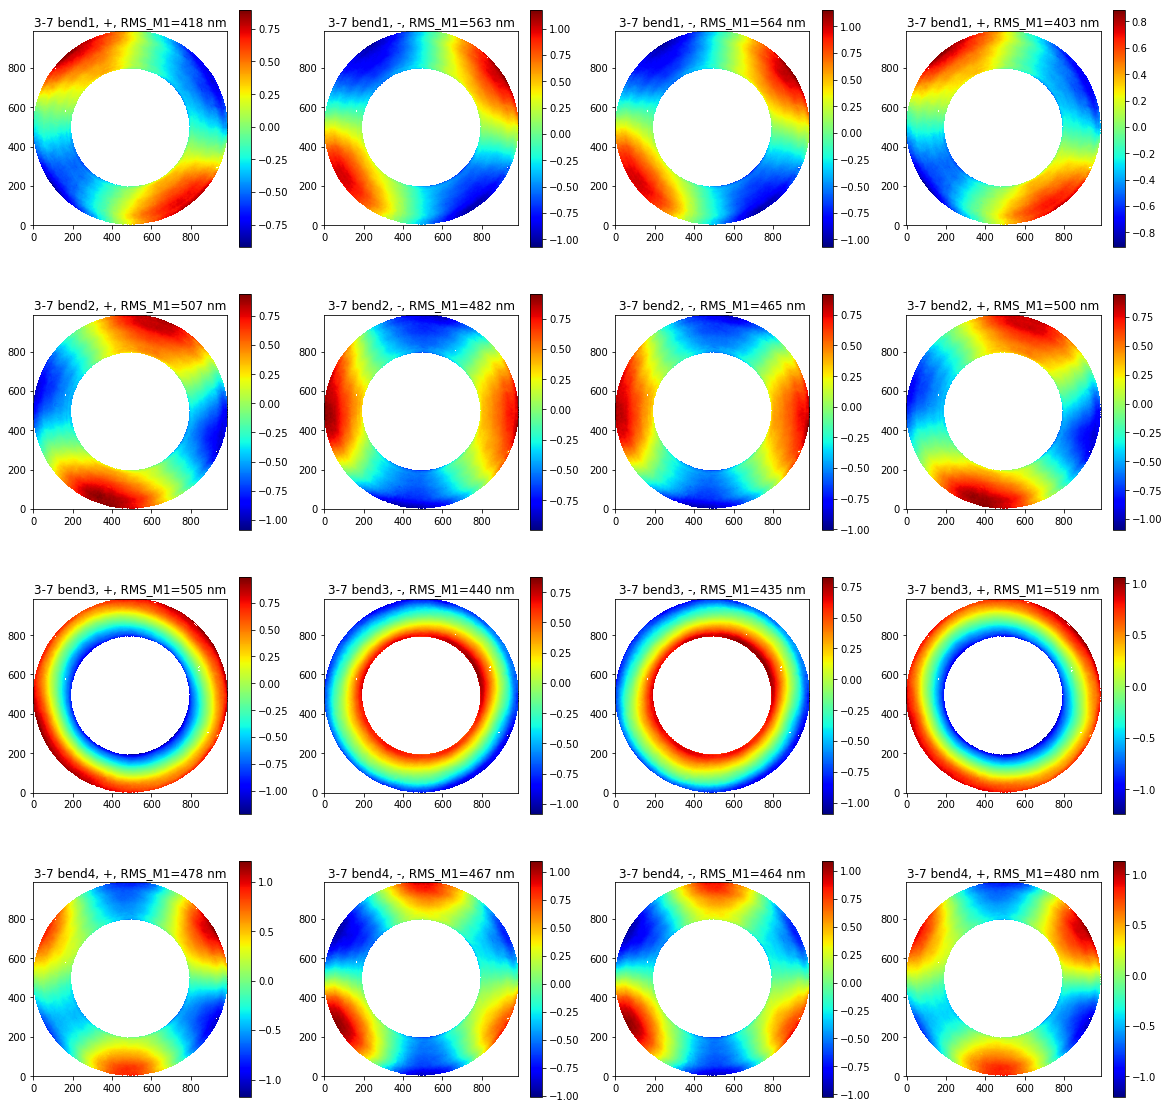

In [12]:
testID = '3-7' #Mirror Lab put this in 3-5 folder.
fig, ax = plt.subplots(4,4,figsize=(20,20))
i = 0
for modeID in range(1,5):
    signedBend = ['+%d-1'%modeID, '-%d-1'%modeID, '-%d-2'%modeID, '+%d-2'%modeID]
    for bend in signedBend:
        irow = np.int8(i/4)
        icol = np.mod(i,4)
        i += 1
        print('%s bending mode %s ------ irow = %d, icol = %d, -----------------------------'%(
            testID, modeID, irow, icol))
        fileset = sorted(glob.glob('%s/Processed/%d_%s/%d %s M1 bm%s*burst*morph.h5'%(
            dataDir, dateID, testID, dateID, testID, bend)))
        m1s,centerRow1,centerCol1,pixelSize1 = readH5Map(fileset)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[irow][icol].imshow(m1s, origin='lowerleft')
        fig.colorbar(img, ax=ax[irow][icol])
        ax[irow][icol].set_title('%s bend%d, %s, RMS_M1=%.0f nm'%(testID, modeID, bend[0], m1rms))